# Billboard's 50 Best Afrobeats Songs of the Past Decade
**Bayowa Onabajo**
**12/08/2025**

### Introduction: 
Over the past decade, Afrobeats has evolved from a regional West African sound into a globally influential musical movement. Artists from across Africa,particularly West Africa,have achieved unprecedented international visibility through chart performance, cross-genre collaborations, and cultural impact. Despite this global recognition, questions remain about which songs and artists have most consistently defined the afrobeat genre’s rise.

This explores Billboard’s curated list of the 50 Best Afrobeats Songs to examine which tracks, artists, and time periods have played a central role in shaping Afrobeats’ global trajectory. By extracting and analyzing this dataset, the project combines data-collection with cultural inquiry. Beyond the analytical motivation, this work is also personally meaningful: as a Nigerian, Afrobeats represents both a cultural identity and a living archive of contemporary African creativity.

### Objective: 
- Extraction of top 50 afrobeats songs from the billboard web-page.  
- Clean and structure the extracted data for analysis.  
- Perform exploratory data analysis and basic visualizations.  
- Create a fully documented Jupyter Notebook file (".ipynb").
- Create a Markdown summary of findings.
- Create an optional CSV file for downstream analysis in future projects.

### Data Source
Billboard – Best Afrobeats Songs  
https://www.billboard.com/lists/best-afrobeats-songs/

### Libraries
- **requests**: retrieve HTML content from Billboard
- **BeautifulSoup**: parse and extract song data from the webpage
- **pandas**: clean, structure, and analyze the dataset
- **time**: to control request timing

In [105]:
# Load libraries
import pandas as pd
import numpy as np

#install packages if needed
!pip install seaborn
!pip install wordcloud 

# scraping
import requests
from bs4 import BeautifulSoup
import time

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud  

# System
import os
from datetime import datetime

print("Libraries imported!")

Libraries imported!


In [107]:
url = "https://www.billboard.com/lists/best-afrobeats-songs/"

headers = {
    "User-Agent": "Mozilla/5.0"
}

response = requests.get(url, headers=headers)

response.status_code


200

In [109]:
soup = BeautifulSoup(response.text, "html.parser")


In [111]:
soup.prettify()[:1000]


'<!DOCTYPE html>\n<!--[if IE 6]>\n<html id="ie6" lang="en-US">\n<![endif]-->\n<!--[if IE 7]>\n<html id="ie7" lang="en-US">\n<![endif]-->\n<!--[if IE 8]>\n<html id="ie8" lang="en-US">\n<![endif]-->\n<!--[if !(IE 6) | !(IE 7) | !(IE 8) ]><!-->\n<html lang="en-US">\n <!--<![endif]-->\n <head>\n  <meta charset="utf-8"/>\n  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>\n  <meta content="#ffffff" name="theme-color"/>\n  <meta content="width=device-width, initial-scale=1.0" name="viewport">\n   <!-- Add to home screen for iOS -->\n   <meta content="black-translucent" name="apple-mobile-web-app-status-bar-style"/>\n   <link href="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/icons/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>\n   <!-- Tile icons for Windows -->\n   <meta content="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/browserconfig.xml" name="msapplication-config"/>\n   <meta content="http

In [113]:
import json
import re
scripts = soup.find_all("script")

len(scripts)


134

In [115]:
# Examine contents of few script tags 
for i, script in enumerate(scripts[:10]):
    print(f"--- Script {i} ---")
    print(script.text[:300])


--- Script 0 ---

			window.dataLayer = window.dataLayer || [];
			function gtag(){dataLayer.push(arguments);}

			window.pmc_google_consent_mode = {
				init: function(opts = {}) {
					/** @type string[] */
					const consentGroups = window.pmc_onetrust_helpers?.getActiveConsentGroups?.() || [];

					/**
					 * 
--- Script 1 ---

/* <![CDATA[ */
var pmc_meta = {"lob":"billboard","lob_genre":"Music","page-type":"single-pmc_list","env":"desktop","primary-category":"Music","primary-vertical":"","vertical":"","category":["Music","Music News"],"tag":["African Music"],"author":"","logged-in":"","subscriber-type":"","country":"us"
--- Script 2 ---

			(function(d,w){
				var i, parts, name, c, rdecode = /(%[0-9A-Z]{2})+/g, rspace = /\+/g, ac = (d ? d.split('; ') : []);
				for(w.pmc_cookies = {}, i = 0; i < ac.length; i++) {
					parts = ac[i].split('='), name = parts[0].replace(rdecode, decodeURIComponent), c = parts.slice(1).join('=');
				
--- Script 3 ---

			if ( window.hasOwnPropert

In [117]:
json_scripts = soup.find_all("script", type="application/ld+json")
len(json_scripts)


4

In [119]:
json_scripts[0].string[:500]


'\n\t\t\t\t{\n    "@context": "https://schema.org",\n    "@type": "Organization",\n    "url": "https://www.billboard.com",\n    "name": "Billboard",\n    "logo": "https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/build/svg/billboard.svg"\n}\n\t\t\t'

In [121]:
for i, script in enumerate(json_scripts):
    print(f"\n--- JSON Script {i} ---\n")
    print(script.string[:600])



--- JSON Script 0 ---


				{
    "@context": "https://schema.org",
    "@type": "Organization",
    "url": "https://www.billboard.com",
    "name": "Billboard",
    "logo": "https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/build/svg/billboard.svg"
}
			

--- JSON Script 1 ---

{"@context":"https:\/\/schema.org","@type":"NewsArticle","headline":"The 50 Best Afrobeats Songs of All Time: Full Staff List","url":"http:\/\/www.billboard.com\/lists\/best-afrobeats-songs\/","mainEntityOfPage":{"@type":"WebPage","@id":"http:\/\/www.billboard.com\/lists\/best-afrobeats-songs\/"},"thumbnailUrl":"https:\/\/www.billboard.com\/wp-content\/uploads\/2025\/07\/50-Best-Afrobeats-Songs-of-All-Time-List-HERO-Staff-Picks-2025-billboard-1548.jpg?w=150&h=150&crop=1","image":{"@type":"ImageObject","url":"https:\/\/www.billboard.com\/wp-content\/uploads\/2025\/07\/50-Best-Afrobeats-Songs-of

--- JSON Script 2 ---


			{"@context":"https:\/\/schema.org","@type":"BreadcrumbList","itemL

In [123]:
h3_tags = soup.find_all("h3")
len(h3_tags)


33

In [125]:
for h in h3_tags[:10]:
    print(h.get_text(strip=True))


Want to know what everyone in the music business is talking about?
Get in the know on
Trending
How ‘KPop Demon Hunters’ Changed the Game For Netflix
Lady Gaga Abruptly Stops Mayhem Ball Show Mid-Performance After Dancer Falls Off Stage in Australia
Debby Ryan Welcomes Baby With Twenty One Pilots’ Josh Dun
Riley Green & Ella Langley Join Blake Shelton & Gwen Stefani for History Atop Country Airplay Chart
The Daily
Jennifer Lawrence, Josh Hutcherson to Return for 'Hunger Games: Sunrise on the Reaping'
Jewel’s Super-Rare Bikini Photos Show She’s Living Her Best Life ‘Before More Winter Snow'


In [127]:
li_tags = soup.find_all("li")
len(li_tags)


237

In [129]:
for li in li_tags[:20]:
    print(li.get_text(strip=True))


Charts
Music
Video
Crossword
Awards
Business
Manage Account
Log Out
Charts
Music
Video
Crossword
Awards
Business
Manage Account
Log Out
Hot 100
Chart Beat
Year End Charts
Shop


In [131]:
articles = soup.find_all("article")
len(articles)


51

In [133]:
for a in articles[:10]:
    print(a.get_text(strip=True)[:300])
    print("-" * 40)


Over the last decade, Afrobeats has made significant inroads in the global music industry, from invitations to conquer the biggest stages in the world to cross-cultural collaborations with Western superstars like Beyoncé, Drake and Ed Sheeran. And it’s earned institutional recognition.Billboardlaunc
----------------------------------------
50. Weird MC, “Ijoya” (2006)To put it simply, Weird MC was radical. She strode onto the scene with baggy pants, a shaved head and a hip-hop-inspired bravado – incredibly novel for women who were already the minority in Nigerian music. On the Don Jazzy and JJC Skillz-produced “Ijoya,” she proved hers
----------------------------------------
49. Nonso Amadi, “Tonight” (2016)Soulfully tinged with R&B tendencies, Nonso Amandi’s breakout hit “Tonight” bathes in an array of genres and thus articulates the breadth and depth of Afrobeats in the middle of the 2010s. The song not only helped spearhead Afro-R&B — a pocket in which artists like T
---------------

In [135]:
song_articles = []

for a in articles:
    text = a.get_text(" ", strip=True)
    if any(str(i) in text[:20] for i in range(1, 51)):
        song_articles.append(text)

len(song_articles)


50

In [137]:
song_articles[:5]


['50. Weird MC, “Ijoya” (2006) To put it simply, Weird MC was radical. She strode onto the scene with baggy pants, a shaved head and a hip-hop-inspired bravado –\xa0incredibly novel for women who were already the minority in Nigerian music. On the Don Jazzy and JJC Skillz-produced “Ijoya,” she proved herself to be ahead of her time not only where aesthetics were concerned, but also in craft. Her slick Yoruba lyricism and rapid-fire delivery, accentuated now and again by talking drums, make “Ijoya” an ageless dance hit, while the song’s inventive visuals made her the first-ever Afrobeats artist to release an animated music video. – BLOSSOM MADUAFOKWA',
 '49. Nonso Amadi, “Tonight” (2016) Soulfully tinged with R&B tendencies, Nonso Amandi’s breakout hit “Tonight” bathes in an array of genres and thus articulates the breadth and depth of Afrobeats in the middle of the 2010s.\xa0The song not only helped spearhead Afro-R&B — a pocket in which artists like Tems comfortably sit today — but al

In [139]:
import re
import pandas as pd

ranks = []
artists = []
songs = []
years = []
descriptions = []


In [141]:
ranks, artists, songs, years, descriptions


([], [], [], [], [])

In [145]:
for entry in song_articles:
    
    # Rank
    rank_match = re.match(r"(\d+)\.", entry)
    rank = int(rank_match.group(1)) if rank_match else None

    # Year
    year_match = re.search(r"\((\d{4})\)", entry)
    year = int(year_match.group(1)) if year_match else None

    # divide main header from description
    header, *desc = entry.split(")", 1)
    description = desc[0].strip() if desc else ""

    # Extraction of artist and song
    header_clean = header.split(".", 1)[1].strip()
    artist_song = header_clean.split(",", 1)

    artist = artist_song[0].strip()
    song = artist_song[1].replace("“", "").replace("”", "").strip() if len(artist_song) > 1 else None

    # Append
    ranks.append(rank)
    artists.append(artist)
    songs.append(song)
    years.append(year)
    descriptions.append(description)


In [147]:
len(song_articles)


50

In [157]:
import re

ranks = []
artists = []
songs = []
years = []
descriptions = []

pattern = re.compile(
    r"(\d+)\.\s*(.*?)\,\s*“(.*?)”\s*\((\d{4})\)\s*(.*)"
)

for text in song_articles:
    match = pattern.search(text)
    if match:
        ranks.append(match.group(1))
        artists.append(match.group(2))
        songs.append(match.group(3))
        years.append(match.group(4))
        descriptions.append(match.group(5).strip())


In [159]:
len(ranks), len(artists), len(songs), len(years)


(50, 50, 50, 50)

In [161]:
len(ranks), len(artists), len(songs), len(years), len(descriptions)


(50, 50, 50, 50, 50)

In [177]:
df_afrobeats50 = pd.DataFrame({
    "Rank": ranks,
    "Artist": artists,
    "Song Title": songs,
    "Year": years,
    "Description": descriptions
})

df_afrobeats50.head(10)

,Rank,Artist,Song Title,Year,Description
0,50,Weird MC,Ijoya,2006,"To put it simply, Weird MC was radical. She st..."
1,49,Nonso Amadi,Tonight,2016,"Soulfully tinged with R&B tendencies, Nonso Am..."
2,48,Timaya,Dem Mama,2005,Image Credit: Courtesy Photo There is no Afrob...
3,47,Jazzman Olofin feat. Adewale Ayuba,Raise Da Roof,2004,Long before Afrobeats fully emerged in the ear...
4,46,Victony & Tempoe,Soweto,2022,“Soweto” emerged as a semi-sleeper hit from Vi...
5,45,Olu Maintain,Yahooze,2007,With minimal institutional support accessible ...
6,44,Ice Prince feat. Brymo,Oleku,2010,Hip-hop is undoubtedly an integral part of Afr...
7,43,Kizz Daniel feat. Tekno,Buga,2022,Since breaking into the Afrobeats scene in 201...
8,42,Libianca,People,2022,The Cameroonian American singer-songwriter pou...
9,41,Asake,Peace Be Unto You (PBUY),2022,Image Credit: Courtesy Photo By the time Asake...


In [179]:
#Remove "image credit" from Description column
df_afrobeats50["Description"] = df_afrobeats50["Description"].str.replace(
    r"Image Credit:.*?(?=[A-Z])", "", regex=True
)


In [181]:
#Converting Rank and Year columns to numeric
df_afrobeats50["Rank"] = df_afrobeats50["Rank"].astype(int)
df_afrobeats50["Year"] = df_afrobeats50["Year"].astype(int)


In [183]:
df_afrobeats50 = df_afrobeats50.sort_values("Rank")
df_afrobeats50.head(10)


,Rank,Artist,Song Title,Year,Description
49,1,2Baba,African Queen,2004,When the Nigerian boy band Plantashun Boiz dis...
48,2,Wizkid,Ojuelegba,2014,Courtesy Photo In the aftermath of early caree...
47,3,Flavour,Nwa Baby (Ashawo Remix),2011,While the world is much more acquainted with t...
46,4,Rema,Calm Down,2022,What sounds on its surface like a mid-tempo lo...
45,5,Wizkid feat. Tems,Essence,2020,"“Essence” is a masterfully crafted hit, each c..."
44,6,CKay,Love Nwantiti,2019,"CKay’s “Love Nwantiti” is instantly sultry, wi..."
43,7,D’banj,Oliver Twist,2011,Christie Goodwin/Redferns/Getty Images Before ...
42,8,Davido,Fall,2017,Davido showers his lucky lady with dollars and...
41,9,Burna Boy,Ye,2018,"A notorious and undisputed Burna Boy classic, ..."
40,10,P-Square,Chop My Money (Remix),2012,At the time the “Chop My Money (Remix)” was re...


In [185]:
#CSV file
df_afrobeats50.to_csv("top_50_afrobeats_billboard.csv", index=False)


In [187]:
df_afrobeats50["Year"].value_counts().sort_index()


Year
2003    1
2004    2
2005    1
2006    1
2007    1
2008    3
2009    1
2010    1
2011    4
2012    1
2013    4
2014    4
2015    2
2016    6
2017    1
2018    2
2019    2
2020    2
2021    2
2022    8
2023    1
Name: count, dtype: int64

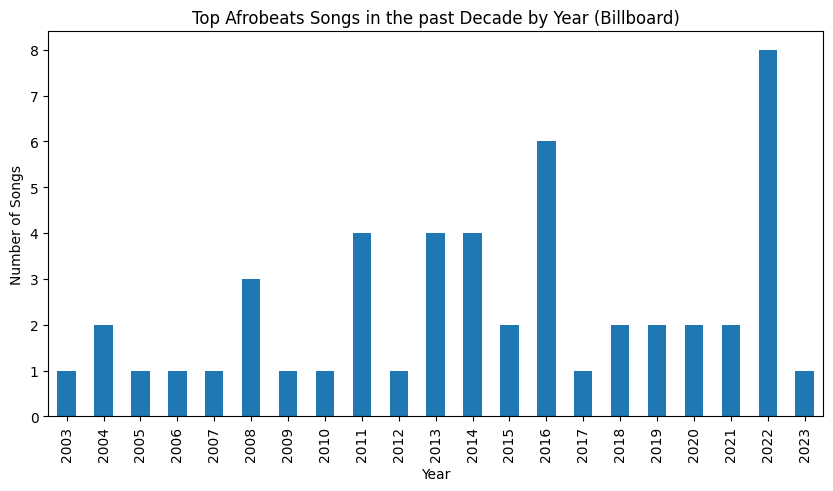

In [191]:
import matplotlib.pyplot as plt

df_afrobeats50["Year"].value_counts().sort_index().plot(kind="bar", figsize=(10,5))
plt.title("Top Afrobeats Songs in the past Decade by Year (Billboard)")
plt.xlabel("Year")
plt.ylabel("Number of Songs")
plt.show()


### Temporal Trends:
The bar chart illustrates the number of top-ranked songs by year, showing a relatively sparse distribution in the early 2000s, followed by steady growth after 2010. The pronounced increase around 2011 and the strong representation in 2022 reflect key moments when Afrobeats gained heightened international exposure. These spikes likely correspond to factors such as increased global chart penetration, the advent of social media, viral digital distribution, and broader Afrobeats appeal.

In [193]:
df_afrobeats50["Artist"].value_counts().sort_index()

Artist
2Baba                                 1
9ice                                  1
Afro B                                1
Amaarae & MOLIY                       1
Asake                                 1
Ayra Starr                            1
Burna Boy                             2
Burna Boy feat. Zlatan                1
CKay                                  1
Davido                                2
Davido feat. Musa Keys                1
D’banj                                2
Fireboy DML                           1
Flavour                               1
Fuse ODG feat. Itz Tiffany            1
Ice Prince feat. Brymo                1
Jazzman Olofin feat. Adewale Ayuba    1
Kizz Daniel feat. Tekno               1
Libianca                              1
Lojay & Sarz                          1
Maleek Berry                          1
Mr. Eazi & Efya                       1
Nonso Amadi                           1
Olamide                               1
Olu Maintain                     

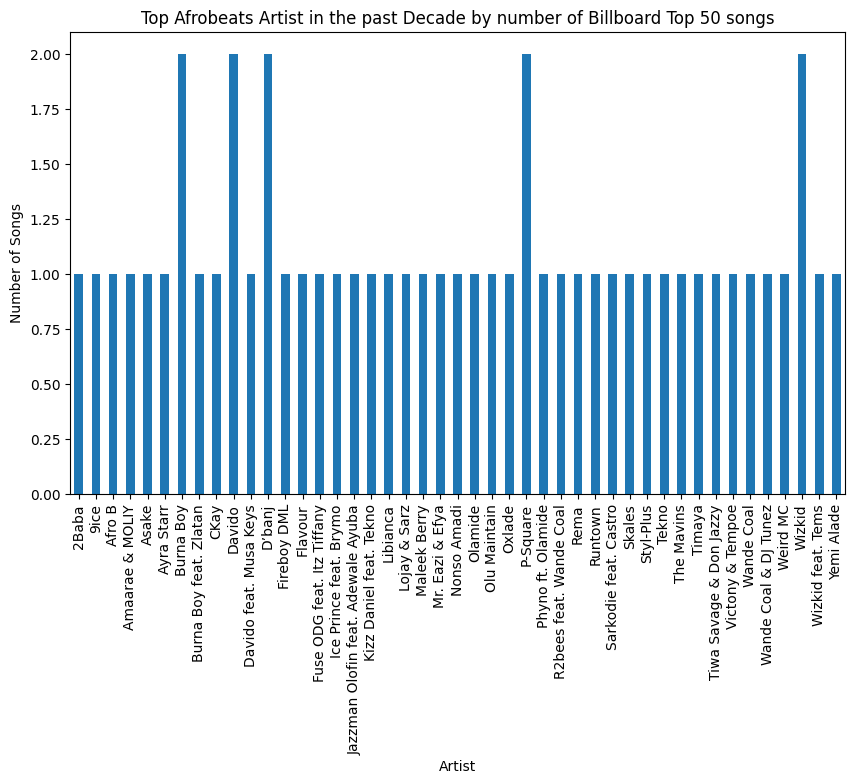

In [201]:
import matplotlib.pyplot as plt

df_afrobeats50["Artist"].value_counts().sort_index().plot(kind="bar", figsize=(10,6))
plt.title("Top Afrobeats Artist in the past Decade by number of Billboard Top 50 songs")
plt.xlabel("Artist")
plt.ylabel("Number of Songs")
plt.show()


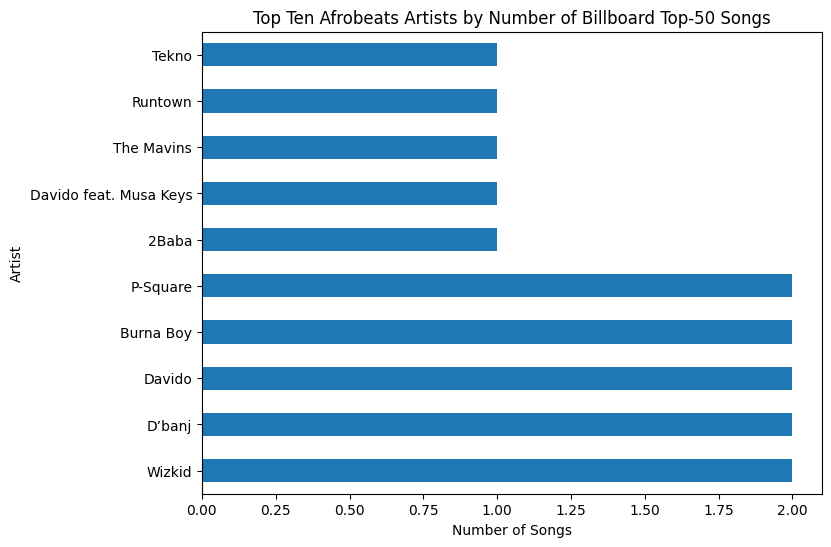

In [199]:
df_afrobeats50["Artist"].value_counts().head(10).plot(
    kind="barh", figsize=(8,6)
)

plt.title("Top Ten Afrobeats Artists by Number of Billboard Top-50 Songs")
plt.xlabel("Number of Songs")
plt.ylabel("Artist")
plt.show()


### Artist Concentration: Broad Influence Over Single Dominance

The bar chart of the top ten artists shows that most artists appear once, while only a select few appear twice. This clustering at low counts explains why the earlier plot appeared visually dense: Afrobeats’ influence is widely spread across many artists rather than concentrated in a single dominant figure. The few artists with multiple entries represent the pillars of the Afrobeats genre, whose work has consistently shaped its global narrative. However, it is important to note that a foundational artist like Tuface (2Baba), who has the decade's number one song, is not reflected as a pillar when considering his total number of songs on the chart, particularly when compared to counterparts like Davido, Wizkid, and Psquare. This low representation may be explained by 2Baba's switch after 2006 from his influential label (Kennis Music), which produced and promoted the number one song, to his personal record label.

### Conclusion
This analysis of Billboard’s 50 Best Afrobeats Songs provides insight into the temporal evolution and artistic concentration of Afrobeats over the past two decades. The year-based distribution highlights a clear intensification of Afrobeats’ global visibility in the mid-to-late 2010s, with notable peaks in 2016 and 2022. These periods align with Afrobeats’ transition from a regional genre to a globally recognized musical movement, driven by increased international collaborations, streaming platforms,scoail media and institutional recognition by Global music industries.
The artist-level analysis reveals that while Afrobeats is characterized by a diverse pool of contributors, a small group of artists, most notably Davido, Wizkid, Burna Boy, D’banj, and P-Square—appear multiple times within the Top 50 list. This pattern suggests the coexistence of both artist dominance and genre openness, where a few globally influential figures shape the genre’s international footprint while still allowing space for emerging and legacy acts to contribute defining works.
Overall, the findings reinforce Afrobeats as a dynamic, evolving genre shaped by both historical continuity and contemporary innovation. From early foundational tracks in the 2000s to the genre’s global peak in the 2020s, Afrobeats demonstrates sustained cultural relevance, creative diversity, and growing global influence.

### References:

Billboard Best Afrobeats Songs; https://www.billboard.com/lists/best-afrobeats-songs/

Trickle Media; https://tricklemedia.net/2face-idibia-a-lifetime-of-controversies/

Wikipedia Billboard U.S Afrobeats Songs; https://en.wikipedia.org/wiki/Billboard_U.S._Afrobeats_Songs